<a href="https://colab.research.google.com/github/ajayvallabh/GraphNeuralNetwork/blob/main/GNN_cora_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
! python -c "import torch; print (torch.version.cuda)"

12.4


In [40]:
# Pythorch version
!python -c "import torch; print(torch.__version__)"

2.6.0+cu124


In [41]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.6.0+cu124.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.6.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html


In [42]:
import torch
from torch_geometric.data import Data

# Common Benchmark Datasets

PyG contains a large number of common benchmark datasets, e.g., all Planetoid datasets (Cora, Citerseer, Pubmed), all graph classification datasets from graphkernels.cu.tu and thier cleaned version.

Initializing a dataset is straightforward. An initialization of a dataset will automatically download its row files and process them to previously described Data format. E.g., to load the Enzymes dataset consist of 600 graph with six classes, type.

In [43]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

In [44]:
len(dataset)

600

In [45]:
dataset.num_classes

6

In [46]:
dataset.num_node_features

3

In [47]:
data = dataset[0]

data.x Node feature matrix with shape [num_nodes, num_node_features]

data.edge_index: Graph connectivity in COO format with shape[2, num_edges] and type torch.long

data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]

data.y: Target to train against (may have arbitrary shape), e.g, node-level

targets of shape [num_nodes, *] or graph-level targets of shape [1, *]

data.pos: Node position matrix with shape [num_nodes, num_dimensions]

In [48]:
data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [49]:
from torch_geometric.utils import to_networkx

In [50]:
type(data)

torch_geometric.data.data.Data

In [51]:
networkX_graph = to_networkx(data)

In [52]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

In [53]:
import networkx as nx

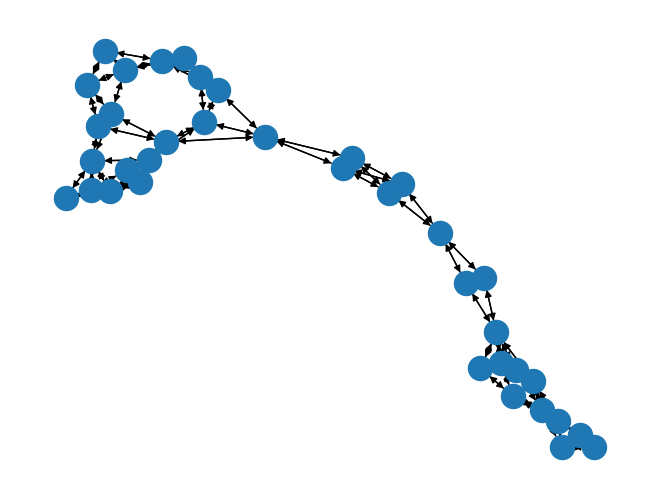

In [54]:
nx.draw(networkX_graph)

# Cora dataset

The Cora dataset consist of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consist of 1433 unique words

In [55]:
from torch_geometric.datasets import Planetoid
cora_dataset = Planetoid(root = 'tmp/Cora', name = 'Cora')

In [56]:
cora_dataset

Cora()

In [57]:
cora_dataset.len()

1

In [58]:
# number of graphs
print("Number of graphs: ", len(cora_dataset))

# number of features
print("Number of features: ", cora_dataset.num_features)

# number of graphs
print("Number of classes: ", cora_dataset.num_classes)


Number of graphs:  1
Number of features:  1433
Number of classes:  7


In [59]:
c_ds = cora_dataset[0]

In [60]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [61]:
# number of nodes
print("Number of nodes: ", c_ds.num_nodes)

# number of edges
print("Number of edges: ", c_ds.num_edges)

# check if directed
print("Is directed: ", c_ds.is_directed())

Number of nodes:  2708
Number of edges:  10556
Is directed:  False


In [62]:
c_ds.x[:0].shape

torch.Size([0, 1433])

In [63]:
c_ds.x[:1].shape

torch.Size([1, 1433])

In [64]:
c_ds.x[0].shape

torch.Size([1433])

In [65]:
# Sample nodes from the graph
print("Shape of sample nodes:", c_ds.x[:5].shape)

Shape of sample nodes: torch.Size([5, 1433])


In [66]:
c_ds_5 = c_ds.x[:5]

In [67]:
c_ds_5.shape

torch.Size([5, 1433])

In [68]:
from os import CLD_STOPPED
# number of graphs
print("Number of graphs: ", len(c_ds_5))
print("Number of features: ", len(c_ds_5[0]))


Number of graphs:  5
Number of features:  1433


In [69]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [70]:
 # train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [71]:
# Check the training nodes
print("# of nodes to train on:", c_ds.train_mask.sum().item())
# Check test nodes
print("# of nodes to test on:", c_ds.test_mask.sum().item())
# Check validation nodes
print("# of nodes to validate on:", c_ds.val_mask.sum().item())

# of nodes to train on: 140
# of nodes to test on: 1000
# of nodes to validate on: 500


In [72]:
type(c_ds)

torch_geometric.data.data.Data

In [73]:
networkX_graph = to_networkx(c_ds)

In [74]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

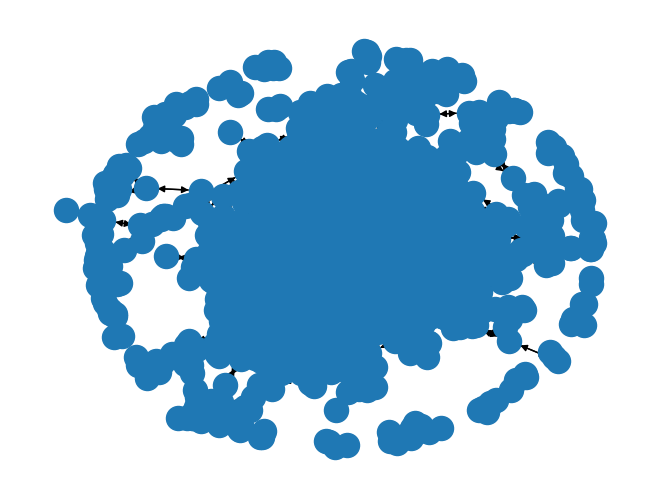

In [38]:
nx.draw(networkX_graph)

In [75]:
networkX_graph

In [76]:
print(nx.is_weighted(networkX_graph))
print(nx.is_directed(networkX_graph))
print(networkX_graph.order())
print(networkX_graph.number_of_edges())
print(networkX_graph.number_of_nodes())
print(networkX_graph.edges)
print(networkX_graph.nodes)

False
True
2708
10556
2708
[(0, 633), (0, 1862), (0, 2582), (1, 2), (1, 652), (1, 654), (2, 1), (2, 332), (2, 1454), (2, 1666), (2, 1986), (3, 2544), (4, 1016), (4, 1256), (4, 1761), (4, 2175), (4, 2176), (5, 1629), (5, 1659), (5, 2546), (6, 373), (6, 1042), (6, 1416), (6, 1602), (7, 208), (8, 269), (8, 281), (8, 1996), (9, 723), (9, 2614), (10, 476), (10, 2545), (11, 1655), (11, 1839), (12, 1001), (12, 1318), (12, 2661), (12, 2662), (13, 1701), (13, 1810), (14, 158), (14, 2034), (14, 2075), (14, 2077), (14, 2668), (15, 1090), (15, 1093), (15, 1271), (15, 2367), (16, 970), (16, 1632), (16, 2444), (16, 2642), (17, 24), (17, 927), (17, 1315), (17, 1316), (17, 2140), (18, 139), (18, 1560), (18, 1786), (18, 2082), (18, 2145), (19, 1939), (20, 1072), (20, 2269), (20, 2270), (20, 2374), (20, 2375), (21, 1043), (21, 2310), (22, 39), (22, 1234), (22, 1702), (22, 1703), (22, 2238), (23, 2159), (24, 17), (24, 201), (24, 598), (24, 1636), (24, 1701), (24, 2139), (24, 2141), (25, 1301), (25, 1344)

In [77]:
c_ds.x.shape

torch.Size([2708, 1433])

In [78]:
c_ds.x[2707].shape

torch.Size([1433])

In [79]:
c_ds_10 = c_ds.x[:10]

In [80]:
c_ds_10.shape

torch.Size([10, 1433])

In [81]:
type(c_ds_10)

torch.Tensor

In [82]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [83]:
nx.write_gexf(networkX_graph, 'cora_ex.gexf')

In [84]:
nx.write_graphml(networkX_graph, 'cora_ex.graphml')

# Cora Dataset from NetworkX

- downloaded cora.tgz from the link below"

- upload cora.tgz to google colab

In [86]:
!tar -xvf /content/cora.tgz

cora/
cora/README
cora/cora.cites
cora/cora.content


In [89]:
import os
import networkx as nx
import pandas as pd
data_dir = os.path.expanduser("/content/cora")

In [95]:
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header= None, names=["target", "source"])
edgelist["label"] = "cites"

In [96]:
edgelist.sample(frac=1).head(5)

,target,source,label
1150,5966,1102625,cites
100,35,44368,cites
1,35,103482,cites
2742,31489,227286,cites
1571,8594,180187,cites


In [97]:
type(edgelist)

pandas.core.frame.DataFrame

In [98]:
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(Gnx, "paper", "label")

In [99]:
print(nx.is_weighted(Gnx))
print(nx.is_directed(Gnx))
print(Gnx.order())
print(Gnx.number_of_edges())
print(Gnx.number_of_nodes())
print(Gnx.nodes)
print(Gnx.edges)

False
False
2708
5278
2708
[1033, 35, 103482, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, 135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, 190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, 248425, 249421, 254923, 259701, 259702, 263279, 263498, 265203, 273152, 27510, 28290, 286500, 287787, 28851, 289779, 289780, 289781, 307015, 335733, 33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, 46079, 46431, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 56119, 561238, 568857, 573964, 573978, 574009, 574264, 57

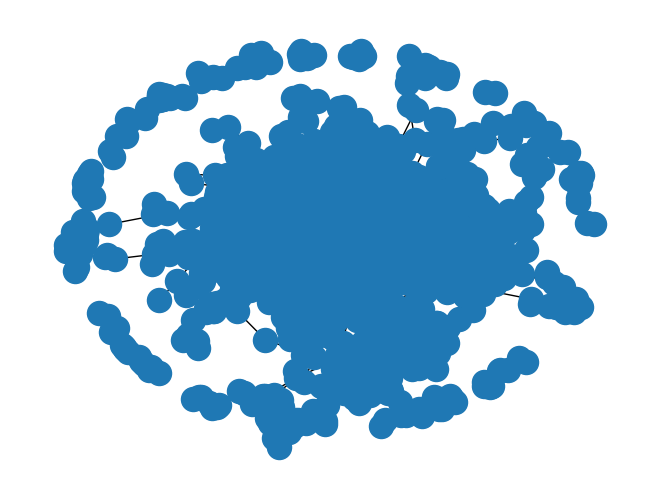

In [101]:
Gnx
nx.draw(Gnx)

In [102]:
Gnx.number_of_nodes()

2708

In [103]:
Gnx.nodes

NodeView((1033, 35, 103482, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, 135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, 190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, 248425, 249421, 254923, 259701, 259702, 263279, 263498, 265203, 273152, 27510, 28290, 286500, 287787, 28851, 289779, 289780, 289781, 307015, 335733, 33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, 46079, 46431, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 56119, 561238, 568857, 573964, 573978, 574009, 574264, 574462, 575077, 5752

In [104]:
# Get the node ID from the above node list
Gnx.nodes[779960]

{'label': 'paper'}

In [105]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names = feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), sep = '\t', header = None, names = column_names)

In [106]:
node_data

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
117328,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [107]:
set(node_data["subject"])

{'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}

In [108]:
node_data

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
117328,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [109]:
data = cora_dataset[0]
print(f'Dataset: {cora_dataset}:')
# number of graphs
print(f"Number of graphs: {len(cora_dataset)}")

# number of features
print("Number of features: ", cora_dataset.num_features)

# number of graphs
print("Number of classes: ", cora_dataset.num_classes)

# number of nodes
print("Number of nodes: ", data.num_nodes)

# number of edges
print("Number of edges: ", data.num_edges)

# check if directed
print("Is directed: ", data.is_directed())


Dataset: Cora():
Number of graphs: 1
Number of features:  1433
Number of classes:  7
Number of nodes:  2708
Number of edges:  10556
Is directed:  False


In [111]:
A = nx.adjacency_matrix(Gnx)
print(A.todense())

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
